In [1]:
import requests

# Get Categories links to category pages

In [2]:
all_categories_html = requests.get('https://rozetka.com.ua/genskie-platya-sarafani-i-yubki/c4637599/')

In [3]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(all_categories_html.text)

/Users/grycshuknazar/anaconda2/envs/env_36/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/grycshuknazar/anaconda2/envs/env_36/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [4]:
categories = soup.find_all("div", class_="all-cat-b")

In [5]:
def def_get_category_data(cat_html):
    data=[]
    cat1_name = cat_html.find("a", class_="all-cat-b-img").find('img')["title"]
    for child in cat_html.find_all('a', class_='all-cat-b-l-i-link-child'):
        data.append({'top_category':cat1_name, 'categoty':child.text, 'link':child['href']})
    return data

In [12]:
import pandas as pd
all_category_links=[]
for category in categories:
    all_category_links = all_category_links+def_get_category_data(category)
    
all_category_links_df = pd.DataFrame(all_category_links)

In [64]:
all_category_links_df[:5]

,categoty,link,top_category
0,\nФлеш память USB\n,https://rozetka.com.ua/usb-flash-memory/c80045/,Ноутбуки и компьютеры
1,\nСумки и рюкзаки для ноутбуков\n,https://rozetka.com.ua/notebook-bags/c80036/,Ноутбуки и компьютеры
2,\nПодставки и столики для ноутбуков\n,https://rozetka.com.ua/notebook_stands/c183690/,Ноутбуки и компьютеры
3,\nВеб-камеры\n,https://rozetka.com.ua/web_cameras/c180143/,Ноутбуки и компьютеры
4,\nМыши для ноутбуков\n,https://hard.rozetka.com.ua/mouses/c80172/2176...,Ноутбуки и компьютеры


In [63]:
#all_category_links_df.to_csv('categories.csv', encoding='utf8', index=False)

In [5]:
import pandas as pd
all_category_links_df = pd.read_csv('categories.csv')
all_category_links_df['top_category'].unique()

array(['Ноутбуки и компьютеры', 'Смартфоны, ТВ и электроника',
       'Бытовая техника', 'Товары для дома', 'Инструменты и автотовары',
       'Сантехника и ремонт', 'Дача, сад и огород', 'Спорт и увлечения',
       'Одежда, обувь и украшения', 'Красота и здоровье',
       'Детские товары', 'Канцтовары и книги',
       'Алкогольные напитки и продукты', 'Товары для бизнеса',
       'Услуги и сервисы'], dtype=object)

# Get products of categories

In [165]:
from lxml.html import soupparser
from scrapy import Selector

def parse_url(url):
    header={}
    header['Connection']='keep-alive'
    header['Accept']='text/javascript, text/html, application/xml, text/xml, */*'
    header['X-Rozetka-Header']='true'
    header['X-Requested-With']='XMLHttpRequest'
    header['User-Agent']='Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/65.0.3325.181 Safari/537.36'
    header['Accept-Encoding']='gzip, deflate, br'
    header['Accept-Language']='ru-RU,ru;q=0.9,en-US;q=0.8,en;q=0.7'
    page = requests.get(url, headers=header)
    sel = Selector(_root=soupparser.fromstring(page.text))
    return parse(sel)
    
def parse(response):
    category = response.xpath("//h1/text()").extract()
    print(category)
    name = response.xpath("//div[@class='g-i-tile-i-box-desc']/*[contains(@class, 'g-i-tile-i-title')]/a/text()").extract()
    comments_link = response.xpath("//div[@class='g-i-tile-i-box-desc']//a[contains(@class, 'g-rating-reviews-link')]/@href").extract()
    curent_page_goods=list(zip(name, comments_link))
    data =[]
    for name, comments_link in curent_page_goods:
        data.append({"name": name, "comments_link": comments_link, 'category':category})
    return data
 

top_category='Смартфоны, ТВ и электроника'
all_comment_links=[]
first_n_page=6
for link in all_category_links_df[all_category_links_df['top_category']==top_category]['link'].values:
        for page in range(1,first_n_page):
            all_comment_links.append(parse_url('{0}/page={1};sort=popularity'.format(link,page)))

/Users/grycshuknazar/anaconda2/envs/env_36/lib/python3.6/site-packages/ipykernel_launcher.py:14: ScrapyDeprecationWarning: Argument `_root` is deprecated, use `root` instead
  


['Страница не найдена']
['Страница не найдена']
['Страница не найдена']
['Страница не найдена']
['Страница не найдена']
['\nУниверсальные мобильные батареи, подходят для зарядки мобильных телефонов\n']
['\nУниверсальные мобильные батареи, подходят для зарядки мобильных телефонов\n']
['\nУниверсальные мобильные батареи, подходят для зарядки мобильных телефонов\n']
['\nУниверсальные мобильные батареи, подходят для зарядки мобильных телефонов\n']
['\nУниверсальные мобильные батареи, подходят для зарядки мобильных телефонов\n']
['\nКарты памяти\n']
['\nКарты памяти\n']
['\nКарты памяти\n']
['\nКарты памяти\n']
['\nКарты памяти\n']
['Чехлы для мобильных телефонов']
['Чехлы для мобильных телефонов']
['Чехлы для мобильных телефонов']
['Чехлы для мобильных телефонов']
['Чехлы для мобильных телефонов']
['Страница не найдена']
['Страница не найдена']
['Страница не найдена']
['Страница не найдена']
['Страница не найдена']
['\nМоноподы для селфи\n']
['\nМоноподы для селфи и аксессуары\n']
['\nМоно

['\nBlu-ray/DVD/HD/-медиаплееры\n']
['\nBlu-ray/DVD/HD/-медиаплееры\n']
['\nАудиотехника\n']
['\nМузыкальные центры и магнитолы\n']
['\nМузыкальные центры и магнитолы\n']
['\nМузыкальные центры и магнитолы\n']
['\nАудиотехника\n']
['\nДомашние кинотеатры\n']
['\nДомашние кинотеатры\n']
['\nДомашние кинотеатры\n']
['\nДомашние кинотеатры\n']
['\nДомашние кинотеатры\n']
['\nАкустика Hi-Fi\n']
['\nАкустика Hi-Fi\n']
['\nАкустика Hi-Fi\n']
['\nАкустика Hi-Fi\n']
['\nАкустика Hi-Fi\n']
['\nAV-ресиверы\n']
['\nAV-ресиверы\n']
['\nAV-ресиверы\n']
['\nAV-ресиверы\n']
['\nAV-ресиверы\n']
['\nЦифро-аналоговые преобразователи (ЦАП)\n']
['\nЦифро-аналоговые преобразователи (ЦАП)\n']
['\nЦифро-аналоговые преобразователи (ЦАП)\n']
['\nЦифро-аналоговые преобразователи (ЦАП)\n']
['\nЦифро-аналоговые преобразователи (ЦАП)\n']
['\nСтереоусилители\n']
['\nСтереоусилители\n']
['\nСтереоусилители\n']
['\nСтереоусилители\n']
['\nСтереоусилители\n']
['\nПроекторы для домашнего кинотеатра\n']
['\nПроекторы дл

['Страница не найдена']
['Страница не найдена']
['\nПарковочные системы\n']
['\nПарковочные системы\n']
['\nПарковочные системы\n']
['\nПарковочные системы\n']
['\nПарковочные системы\n']
['\nРадар-детекторы\n']
['\nРадар-детекторы\n']
['\nРадар-детекторы\n']
['\nРадар-детекторы\n']
['\nРадар-детекторы\n']
['\nКамеры заднего вида\n']
['\nКамеры заднего вида\n']
['\nКамеры заднего вида\n']
['\nКамеры заднего вида\n']
['\nКамеры заднего вида\n']
['\nFM-трансмиттеры\n']
['\nFM-трансмиттеры\n']
['\nFM-трансмиттеры\n']
['\nFM-трансмиттеры\n']
['\nFM-трансмиттеры\n']
['\nАлкометры\n']
['\nАлкометры\n']
['\nАлкометры\n']
['\nАлкометры\n']
['\nАлкометры\n']
['\nТермопродукция, автохолодильники, аккумуляторы холода\n']
['\nТермопродукция, автохолодильники, аккумуляторы холода\n']
['\nТермопродукция, автохолодильники, аккумуляторы холода\n']
['\nТермопродукция, автохолодильники, аккумуляторы холода\n']
['\nТермопродукция, автохолодильники, аккумуляторы холода\n']
['\nАвтокомпрессоры\n']
['\nАвто

In [166]:
import numpy as np 
all_comment_links_merged =np.concatenate(all_comment_links)

In [168]:
df_comment_links = pd.DataFrame(all_comment_links_merged)
df_comment_links.to_csv('gadjets_links.csv', encoding='utf8', index=False)

In [169]:
all_comment_links_merged[0]

{'category': ['\nУниверсальные мобильные батареи, подходят для зарядки мобильных телефонов\n'],
 'comments_link': 'https://rozetka.com.ua/xiaomi_mi_power_bank_10000_ndy_02/p3285022/comments/',
 'name': '\nУМБ Xiaomi Mi Power Bank 10000 mAh Silver (VXN4110CN)\n'}

# Get review of the product

In [170]:
def parse_comments_url(url, name):
    header={}
    header['Connection']='keep-alive'
    header['Accept']='text/javascript, text/html, application/xml, text/xml, */*'
    header['X-Rozetka-Header']='true'
    header['X-Requested-With']='XMLHttpRequest'
    header['User-Agent']='Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/65.0.3325.181 Safari/537.36'
    header['Accept-Encoding']='gzip, deflate, br'
    header['Accept-Language']='ru-RU,ru;q=0.9,en-US;q=0.8,en;q=0.7'
    page = requests.get(url, headers=header)
    sel = Selector(_root=soupparser.fromstring(page.text))
    try:
        pages_count = int(sel.xpath("//li[@class='paginator-catalog-l-i']/span/text()").extract()[-1])
    except:
        pages_count=0
    data = parse_comments(sel, name)
    
    if pages_count>1:
        i=2
        while i<=pages_count:
            page = requests.get(url+'/page={0}'.format(i), headers=header)
            sel = Selector(_root=soupparser.fromstring(page.text))
            data = data + parse_comments(sel, name)
            i+=1
    return data

def parse_comments(response, name):
    vote_blocks = response.xpath("//div[@name='comment_vote']")
    data=[]
    for vote in vote_blocks:
        stars = vote.xpath(".//*[@class='g-rating-b']/span/span/@content").extract()
        #print(stars)
        texts = vote.xpath(".//div[@class='pp-review-text']/div/text()").extract()
        while(len(texts)<5):
            texts.append('')
        #print(texts)
        data.append({'comment':texts[0], 'pros':texts[2],'cons':texts[4], 'stars':stars,'name':name})
    return data

data = parse_comments_url(all_comment_links_merged[0]['comments_link'],all_comment_links_merged[0]['name'])
data[0]

/Users/grycshuknazar/anaconda2/envs/env_36/lib/python3.6/site-packages/ipykernel_launcher.py:11: ScrapyDeprecationWarning: Argument `_root` is deprecated, use `root` instead
  # This is added back by InteractiveShellApp.init_path()
/Users/grycshuknazar/anaconda2/envs/env_36/lib/python3.6/site-packages/ipykernel_launcher.py:22: ScrapyDeprecationWarning: Argument `_root` is deprecated, use `root` instead


{'comment': '\nВсё отлично оригинальное Проверил по коду на сайте! Выдаёт свои заявление 6250мА/ч при 5.1V ',
 'cons': '\nЭта цифра написана мелким шрифтом, снизу под огромными цифрами 10000мА/ч-3.7V и 6250мА/ч-5.1V.',
 'name': '\nУМБ ColorWay Arrival 2200 mAh Grey (CW-PB022LIS1GY)\n',
 'pros': '\nВсем кто думает что смогут зарядить на 10000мА/ч это не так, так как это сама ёмкость батарей при 3.7V ',
 'stars': ['5']}

In [ ]:
#ran categoty_scrapper.py

# Prepare Collected Data

In [1]:
import pandas as pd
final_gadjets_df=pd.read_csv('final_gadjets_data.csv.zip',encoding='utf8')
final_clothes_df=pd.read_csv('final_closes_data.csv.zip',encoding='utf8')

In [2]:
def get_type(stars):
    if stars==5:
        return 2
    if stars <4:
        return 0
    return 1

def join_fields(arr):
    s=[]
    for text in arr:
        if isinstance(text,str)==False:
            continue
        tmp= text.strip()
        if len(tmp)==0:
            continue
        else:
            s.append(tmp)
    return ' '.join(s)

def prepare_df_for_training(df):
    df['target']=df['stars'].apply(get_type)
    df['summary']= df[['comment', 'cons', 'pros']].apply(join_fields, axis=1)

In [3]:
prepare_df_for_training(final_gadjets_df)
final_gadjets_df['target'].value_counts()

2    105027
1     32344
0     24778
Name: target, dtype: int64

In [4]:
prepare_df_for_training(final_clothes_df)
final_clothes_df['target'].value_counts()

2    7905
1    1829
0    1023
Name: target, dtype: int64

In [5]:
#lematization
#tfidf
#lightgbm
#feature importanse

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_gadjets_df['summary'].values, final_gadjets_df['target'].values,
                                                    stratify=final_gadjets_df['target'].values, 
                                                    test_size=0.25, shuffle=True, )

# MultinomialNB

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.pipeline import Pipeline

vect = CountVectorizer()
cls = MultinomialNB()
pipeline = Pipeline([
    ('vect', vect),
    ('tfidf', TfidfTransformer()),
    ('cls',cls)
])
pipeline.fit(X_train,y_train)
pipeline.score(X_test,y_test)

0.9537471014850264

In [8]:
#cross domain score
pipeline.score(final_clothes_df['summary'],final_clothes_df['target'])

0.7002881844380403

# SGDClassifier

In [9]:
from sklearn.linear_model import SGDClassifier
vect = CountVectorizer()
cls = SGDClassifier()
pipeline = Pipeline([
    ('vect', vect),
    ('tfidf', TfidfTransformer()),
    ('cls',cls)
])
pipeline.fit(X_train,y_train)
pipeline.score(X_test,y_test)

Z:\anaconda\envs\py_36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9567812916276086

In [10]:
#cross domain score
pipeline.score(final_clothes_df['summary'],final_clothes_df['target'])

0.7204610951008645

# Revers MultinomialNB

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_clothes_df['summary'].values, final_clothes_df['target'].values,
                                                    stratify=final_clothes_df['target'].values, 
                                                    test_size=0.25, shuffle=True, )

In [12]:
vect = CountVectorizer()
cls = MultinomialNB()
pipeline = Pipeline([
    ('vect', vect),
    ('tfidf', TfidfTransformer()),
    ('cls',cls)
])
pipeline.fit(X_train,y_train)
pipeline.score(X_test,y_test)

1.0

In [13]:
#cross domain score
pipeline.score(final_gadjets_df['summary'],final_gadjets_df['target'])

0.6214222721077527

# Merged Dataset  MultinomialNB

In [14]:
full_df =  pd.concat([final_gadjets_df,final_clothes_df])

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(full_df['summary'].values, full_df['target'].values,
                                                    stratify=full_df['target'].values, 
                                                    test_size=0.25, shuffle=True, )

In [16]:
vect = CountVectorizer()
cls = MultinomialNB()
pipeline = Pipeline([
    ('vect', vect),
    ('tfidf', TfidfTransformer()),
    ('cls',cls)
])
pipeline.fit(X_train,y_train)
pipeline.score(X_test,y_test)

0.9581974229069794

# Keep only Ukrainian language

In [17]:
full_df[:5]

,comment,cons,name,pros,stars,target,summary
0,\nКупил для семёрки. Заряжает.,\n,\nBelkin Charge+Sync Mixit Dock для iPhone 5/6...,\n,3,0,Купил для семёрки. Заряжает.
1,\nпокупал для iphone se\n,не всталяется телефон в силиконовом чехле\n,\nBelkin Charge+Sync Mixit Dock для iPhone 5/6...,заряжает норм\n,3,0,покупал для iphone se не всталяется телефон в ...
2,"\nУстройство отличное, идея работает (что быва...",\nДля постоянного использования на рабочем мес...,\nMicrosoft HD-500 для Lumia 950 и Lumia 950 XL\n,\n,5,2,"Устройство отличное, идея работает (что бывает..."
3,"\nдолго искала, довольна, удобно заряжать теле...",дорогой )\n,\nBelkin Charge Dock для Apple Watch + iPhone ...,"очень качественно сделан, тяжелый\n",5,2,"долго искала, довольна, удобно заряжать телефо..."
4,\nКогда будет новая партия?,\n,\nBelkin Charge Dock для Apple Watch + iPhone ...,\n,5,2,Когда будет новая партия?


In [18]:
full_df.shape

(172906, 7)

In [22]:
from multiprocessing import Pool
from langdetect import detect
def detect_lang(text):
    try:
        return detect(text)
    except:
        return "None"
    
from tqdm import tqdm
langs = []
for i in tqdm(range(full_df.shape[0])):
    langs.append(detect_lang(full_df['summary'].values[i]))
    
full_df['lang'] = langs

100%|██████████| 172906/172906 [16:40<00:00, 172.87it/s]


In [23]:
full_df['lang'].unique()

array(['ru', 'uk', 'bg', 'mk', 'af', 'ro', 'fr', 'ca', 'None', 'et', 'en',
       'cy'], dtype=object)

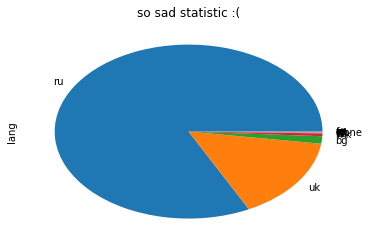

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

full_df['lang'].value_counts().plot(kind='pie', title='so sad statistic :(')
plt.show()

# Train/Predict Ukrainian, aditional predicrt russian

In [50]:
full_df[full_df['lang']=='uk'].shape

(26514, 8)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(full_df[full_df['lang']=='uk']['summary'].values, full_df[full_df['lang']=='uk']['target'].values,
                                                    stratify=full_df[full_df['lang']=='uk']['target'].values, 
                                                    test_size=0.25, shuffle=True, )

In [56]:
vect = CountVectorizer()
cls = SGDClassifier()
pipeline = Pipeline([
    ('vect', vect),
    ('tfidf', TfidfTransformer()),
    ('cls',cls)
])
pipeline.fit(X_train,y_train)
pipeline.score(X_test,y_test)

Z:\anaconda\envs\py_36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


1.0

In [57]:
pipeline.score(full_df[full_df['lang']=='ru']['summary'],full_df[full_df['lang']=='ru']['target'])

0.556897192851981

# Train/Predict Russian, aditional predicrt ukrainian

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(full_df[full_df['lang']=='ru']['summary'].values, full_df[full_df['lang']=='ru']['target'].values,
                                                    stratify=full_df[full_df['lang']=='ru']['target'].values, 
                                                    test_size=0.25, shuffle=True, )

In [47]:
vect = CountVectorizer()
cls = SGDClassifier()
pipeline = Pipeline([
    ('vect', vect),
    ('tfidf', TfidfTransformer()),
    ('cls',cls)
])
pipeline.fit(X_train,y_train)
pipeline.score(X_test,y_test)

Z:\anaconda\envs\py_36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9641624336990992

In [48]:
pipeline.score(full_df[full_df['lang']=='uk']['summary'],full_df[full_df['lang']=='uk']['target'])

0.6319680168967338

# Feature importance

In [61]:
cls.coef_

array([[ 0.23676605, -0.02306416, -0.06285431, ...,  0.        ,
         0.04209435, -0.23959709],
       [-0.14797878, -0.18451326, -0.18856292, ..., -0.62204555,
        -0.18868098,  0.35939563],
       [-0.08878727,  0.23064158,  0.28284439, ...,  0.40362441,
         0.14220431, -0.13976497]])

In [87]:
df_importance=pd.DataFrame()
df_importance['word']=vect.vocabulary_.keys()
df_importance['negative']=cls.coef_[0]
df_importance['normal']=cls.coef_[1]
df_importance['positive']=cls.coef_[2]


In [88]:
#most negative words
df_importance.sort_values(['positive'], ascending=False)[['word','negative', 'normal','positive']][:100]

,word,negative,normal,positive
4551,змазані,-0.546486,-2.174382,2.089090
5608,знизився,-0.564523,-1.293547,2.083746
2726,прослужить,-0.984279,-1.264249,2.059711
884,навігаціїї,-1.233227,-1.552485,2.021034
5388,знаєте,-1.091493,-0.516440,1.723025
3142,якимось,-1.412619,-0.007948,1.660496
2847,обслуговування,0.000000,-1.642633,1.642633
2451,замкнули,-0.482923,-1.435041,1.590934
290,вкладиші,-0.490715,-0.890956,1.535830
4891,зарядилась,-1.413268,-0.647182,1.534663


# Next steps: